In [5]:
from tensorflow.keras.models import load_model
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
import numpy as np
import matplotlib.pyplot as plt
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


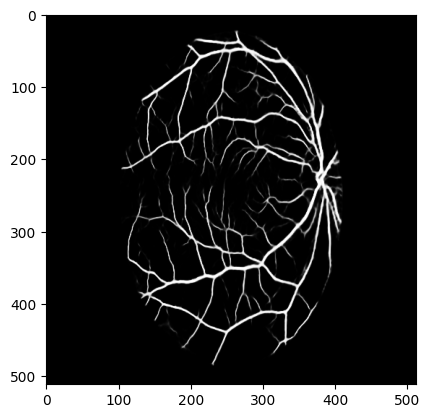

In [8]:
def Test(image):

    def generator(image):
        
        IMAGE_SIZE = 512 

        def read_files(image_path, mask=False):
            image = tf.io.read_file(image_path)
            if mask:
                image = tf.image.decode_png(image, channels=3)
                image = tf.image.rgb_to_grayscale(image)
                image = tf.divide(image, 255)
                image.set_shape([IMAGE_SIZE, IMAGE_SIZE, 1])
                image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
                image = tf.cast(image, tf.int32)
            else:
                image = tf.image.decode_png(image, channels=4)
                image = image[:,:,:3]
                image.set_shape([IMAGE_SIZE, IMAGE_SIZE, 3])
                image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
                image = image / 255.
            return image

        def load_data(image_list, mask_list):
            image = read_files(image_list)
            mask  = read_files(mask_list, mask=True)
            return image, mask

        def data_generator(image_list, mask_list):
            dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
            dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
            dataset = dataset.batch(1, drop_remainder=False)
            return dataset
        
        return data_generator([image], [image])


    image_gen = generator(image) 
    saved_model = load_model('model.h5')   
    predict_mask = saved_model.predict(image_gen)
    plt.imshow(np.squeeze(predict_mask), cmap='gray')

image = "D:/ITI - AI/25. Computer Vision/Final Project/Team1/Retinal Vessel Segmentation/UI_Deployment/uploads/retina_new.png" # image path
Test(image)

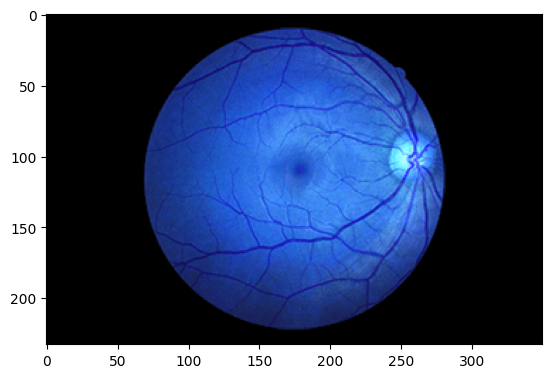

In [9]:
plt.imshow(cv2.imread(image))